# Exercise 04 Classification I

## Pedagogy

This notebook contains both theoretical explanations and executable cells to execute your code.

When you see the <span style="color:red">**[TBC]**</span> (To Be Completed) sign, it means that you need to perform an action else besides executing the cells of code that already exist. These actions can be:
- Complete the code with proper comments
- Respond to a question
- Write an analysis
- etc.

### Import libraries

In [1]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


## Part 1. Logistic regression with a toy dataset

This part will buid a binary classifier using the logistic regression algorithm with a toy dataset.
The aim of this part is to master how to implement logistic regression using `sklearn` and how to calculate various evaluation metrics.

### Load dataset

In this part, we will use a toy dataset provided by `sklearn`: the [Breast cancer wisconsin (diagnostic) dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset).

he breast cancer dataset is a classic and very easy binary classification dataset. You can find the original source of this dataset [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).

There are 30 numeric features in the dataset that might be useful for diagnosing breast cancer. These features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image.

The features include:
- radius
- texture
- perimeter
- area
- smoothness
- compactness
- concavity
- concave points
- symmetry
- fractal dimension

Each example is corresponding to a digitized image with multiple cell nucleus. The above features of each cell nuclei are summarized as a mean value, a worst value and a standard variation.

There are two classes in this dataset: 1 (WDBC-Malignant) and 0 (WDBC-Benign).

Load this dataset using `sklearn.datasets.load_breast_cancer`, you can find the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer).

In [91]:
# load dataset
feature_df, target_df = datasets.load_breast_cancer(
    return_X_y = True,
    as_frame = True
)

In [90]:
# get the basic information of the features
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


There are too many features in the dataset, some of them are highly correlated with each other. For example, the mean value and worst value might be highly correlated.

To simply the problem, we only keep the mean values as the input features and eliminate the worst values and standard deviations.

In [4]:
# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[:10]]
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   mean radius             569 non-null    float64
 1   mean texture            569 non-null    float64
 2   mean perimeter          569 non-null    float64
 3   mean area               569 non-null    float64
 4   mean smoothness         569 non-null    float64
 5   mean compactness        569 non-null    float64
 6   mean concavity          569 non-null    float64
 7   mean concave points     569 non-null    float64
 8   mean symmetry           569 non-null    float64
 9   mean fractal dimension  569 non-null    float64
dtypes: float64(10)
memory usage: 44.6 KB


In [92]:
# print the target class
target_df

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [93]:
# check imbalanced classes
print("Numver of negative class:", sum(target_df == 0))
print("Numver of positive class:", sum(target_df == 1))

Numver of negative class: 212
Numver of positive class: 357


### Train test split

In [94]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)

### Train the model

We will train a logistic regression model to perform binary classification.

Use `sklearn.linear_regression.LogisticRegression` to implement logistic regression.

Logistic regression model outputs the probability of an example belongs to a category. We need to specify a threshold to convert the predicted probabilities to discrete categories.

`sklearn.linear_regression.LogisticRegression` set the default threshold to 0.5

In [95]:
# fit the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluate the model

To evaluate the model performance on the testing dataset, we need to use the trained model to make predictions at first. There are two types of prediction can be made:
- method `predict_proba()` output the predicted probability
- method `predict()` output the predicted category by setting the threshold to 0.5

In [96]:
# predict probability for the first five examples in the testing dataset
clf.predict_proba(X_test[:5, :])

array([[9.93930649e-01, 6.06935141e-03],
       [2.98667934e-02, 9.70133207e-01],
       [1.89993904e-03, 9.98100061e-01],
       [2.36976806e-01, 7.63023194e-01],
       [1.12225608e-04, 9.99887774e-01]])

The output is a 2D array.
- The first column is the probability of being 0 (the negative class)
- The second column is the probability of being 1 (the positive class)
- The sum of each row is equal to 1

In [98]:
# predict the category for the first five examples in the testing dataset
clf.predict(X_test[:5, :])

array([0, 1, 1, 1, 1])

The output is a 1D array consists of predicted categories.
- 0 represent the negative class
- 1 represent the positive class
- The default threshold is 0.5

In [99]:
# make predictions for the entire testing dataset
y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

#### Confusion matrix

Compute confusion matrix using `sklearn.metrics.confusion_matrix`.

Visualization confusion matrix using `sklearn.metrics.ConfusionMatrixDisplay`.

In [100]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 61   2]
 [  5 103]]


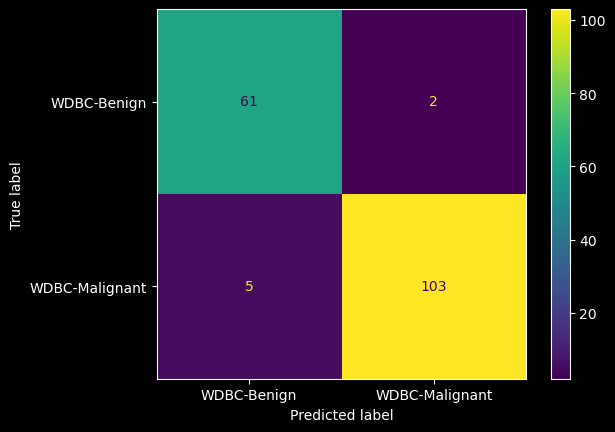

In [101]:
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['WDBC-Benign', 'WDBC-Malignant']
)
disp.plot()
plt.show()

#### Accuracy, precision, recall & F1-score

We can calculate these metrics manually using the confusion matrix.

Or we can `sklearn` to automatically perform the calculation:
- `sklearn.metrics.accuracy_score`
- `sklearn.metrics.precision_score`
- `sklearn.metrics.recall_score`
- `sklearn.metrics.f1_score`

In [102]:
# calculate the metrics manually
accuracy_test = (cm[0, 0] + cm[1, 1]) / cm.sum()
precision_test = cm[1, 1] / (cm[1, 1] + cm[0, 1])
recall_test = cm[1, 1] / (cm[1, 1] + cm[1, 0])
f1_test = 2 * precision_test * recall_test / (precision_test + recall_test)

# print the metrics
print("Accuracy:\t", accuracy_test)
print("Precision:\t", precision_test)
print("Recall:\t\t", recall_test)
print("F1-score:\t", f1_test)

Accuracy:	 0.9590643274853801
Precision:	 0.9809523809523809
Recall:		 0.9537037037037037
F1-score:	 0.9671361502347416


In [103]:
# calcualte the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

Accuracy:	 0.9590643274853801
Precision:	 0.9809523809523809
Recall:		 0.9537037037037037
F1-score:	 0.9671361502347416


In [104]:
# get all metrics using `classification_report`
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        63
           1       0.98      0.95      0.97       108

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



#### ROC curve & AUC

Use `sklearn.metrics.roc_curve` to compute the ROC curve.

Use `sklearn.metrics.roc_auc_score` to calculate the AUC metric.

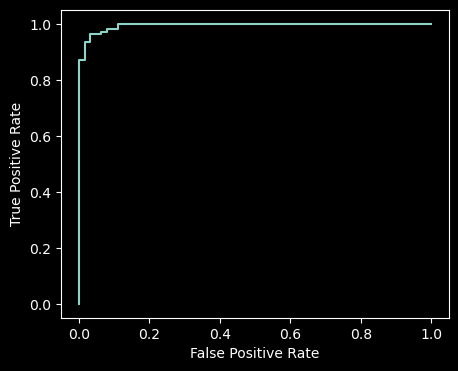

In [105]:
# compute ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
    pos_label = 1 # the positive class is labeled as 1
)

# plot ROC curve
plt.figure(figsize = [5, 4])
plt.plot(fpr, tpr, '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [18]:
# calculate AUC
auc_test = roc_auc_score(
    y_test, # the true class
    y_pred_proba[:, 1], # the second column, the probability of being positive
)
print("AUC:\t", auc_test)

AUC:	 0.982363315696649


## Part 2. Hands-on exercise

In this exercise, we will build a logistic regression model with the the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), the same one as Exercise 02 & 04.

The goal of the logistic regression model is to perform a binary classification taks:
- 0 represent 'Normal Price'
- 1 represent 'Expensive Price'

Since there is no such categorical columns in the dataset, we need to create the target labels according to the `MedHouseVal`, which used to be the target variable for regression problem.
- `MedHouseVal` <= 2.5 $\rightarrow$ 'Normal Price'
- `MedHouseVal` > 2.5 $\rightarrow$ 'Expensive Price'

<span style="color:red">**[TBC]**</span> Please complete the following tasks:
- Load the California Housing Dataset
- Create target labels
- Split the dataset into the training and testing part
- Train the logistic regression model
- Evaluate the trained model with various metrics

### Task 1. Load the California Housing Dataset

<span style="color:red">**[TBC]**</span> It can be downloaded/loaded using the `sklearn.datasets.fetch_california_housing()` function.

In [2]:
# import all libraries used in this notebook here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing 
# Fetch the California housing dataset
data_California = fetch_california_housing(as_frame=True)

# load datasets
feature_df, target_df = data_California.data, data_California.target
"""
feature_df, target_df = datasets.load_fetch_california_housing(
    return_X_y = True,
    as_frame = True
)
"""
# get the basic information of the features
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


### Task 2. Create the target labels

<span style="color:red">**[TBC]**</span> Use `MedHouseVal` as the reference to create a pandas series as the new targel variable.

In [5]:
# [TBC] complete your code here with proper comments
# keep the last 10 columns as the input features
feature_df = feature_df[feature_df.columns[-10:]]
feature_df.info()
# print the target class
target_df
# create a pandas series with MedHouseVal as the reference
# new_target = pd.Series(target_df['MedHouseVal'], name='new_target')

# Since the target_df contains continuous values, you can create a binary classification target based on a threshold.
"""
# For example, using the median value as a threshold:
threshold = target_df.median()
"""
# Create a binary classification target based on the specified threshold
threshold = 2.5
# new_target_df = (target_df > threshold).astype(int)  # Convert to 0 and 1
binary_target_df = (target_df > threshold).astype(int)

# Check imbalanced classes in the new binary target
print("Number of negative class:", sum(binary_target_df == 0))
print("Number of positive class:", sum(binary_target_df == 1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
Number of negative class: 14858
Number of positive class: 5782


### Task 3. Split the dataset into the training and testing part
<span style="color:red">**[TBC]**</span> Please split the whold dataset into two parts: the training and testing set. Please use 70% of the data as the training dataset, and the rest as the testing dataset.

In [6]:
# [TBC] complete your code here with proper comments
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    feature_df.values,
    binary_target_df.values,
    train_size = 0.7,
    shuffle = True,
    random_state = 0
)
#binary_target_df.values,
#target_df.values,

print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))

Size of training dataset: 14447
Size of testing dataset: 6193


### Task 4. Train the logistic regression model
<span style="color:red">**[TBC]**</span> Please use `sklearn.linear_regression.LogisticRegression` to implement logistic regression and train the binary classifier.

In [7]:
# [TBC] complete your code here with proper comments
# fit the model
"""
clf = LogisticRegression()
clf.fit(X_train, y_train)
"""

# Convert the continuous target into a binary classification problem
# threshold = target_df.median()
threshold = 2.5
binary_target_df = (target_df > threshold).astype(int)
# Initialize Logistic Regression model
logistic_model = LogisticRegression()
# Train the model
logistic_model.fit(X_train, y_train)



c:\Users\Jhonnatan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Task 5. Evaluate the trained model with various metrics

<span style="color:red">**[TBC]**</span> Please complete the following steps:
- make predictions for the testing dataset
- compute and visualize the confusion matrix
- calculate accuracy, precision, recall, and F1-score
- compute the ROC curve and AUC
- analysis the performance of this classifier

In [8]:
# [TBC] complete your code here with proper comments
# Predict on the test set
y_pred = logistic_model.predict(X_test)
print(y_pred)
y_pred_proba = logistic_model.predict_proba(X_test)
print(y_pred_proba)
# Predict probability for the first five examples in the testing dataset
y_pred_proba = logistic_model.predict_proba(X_test[:5, :])
print(y_pred_proba)

# Evaluate the model
# calculate the metrics by sklearn
print("Accuracy:\t", accuracy_score(y_test, y_pred))
print("Precision:\t", precision_score(y_test, y_pred))
print("Recall:\t\t", recall_score(y_test, y_pred))
print("F1-score:\t", f1_score(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[0 1 0 ... 0 0 0]
[[0.85658156 0.14341844]
 [0.27806257 0.72193743]
 [0.72284767 0.27715233]
 ...
 [0.97932276 0.02067724]
 [0.56242806 0.43757194]
 [0.93858406 0.06141594]]
[[0.85658156 0.14341844]
 [0.27806257 0.72193743]
 [0.72284767 0.27715233]
 [0.91851826 0.08148174]
 [0.37536871 0.62463129]]
Accuracy:	 0.8409494590666882
Precision:	 0.7888719512195121
Recall:		 0.5938037865748709
F1-score:	 0.6775777414075286
Accuracy: 0.8409494590666882

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4450
           1       0.79      0.59      0.68      1743

    accuracy                           0.84      6193
   macro avg       0.82      0.77      0.79      6193
weighted avg       0.84      0.84      0.83      6193



[[4173  277]
 [ 708 1035]]


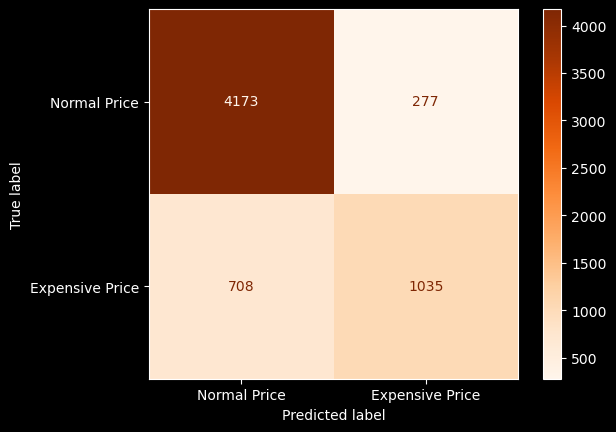

In [9]:
plt.style.use('dark_background')
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# visualize the confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix = cm,
    display_labels = ['Normal Price', 'Expensive Price']
)
disp.plot(cmap='Oranges')
plt.show()

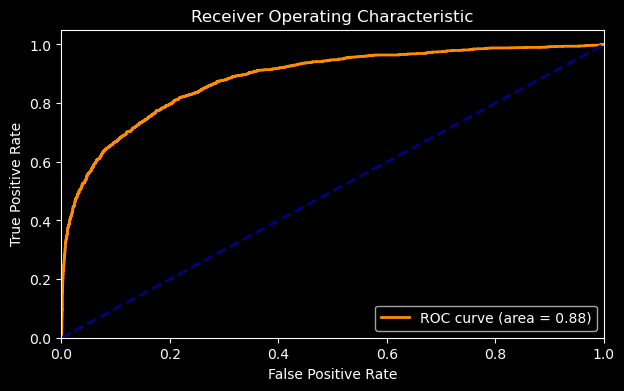

AUC: 0.8829876165980133


In [10]:
from sklearn.metrics import roc_curve, auc
# Predict probabilities on the test dataset
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of the positive class

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize = [7, 4])
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print("AUC:", roc_auc)

<span style="color:red">**[TBC]**</span> Write your analysis here.


#### Confusion Matrix
The confusion matrix indicates that the model is relatively balanced in its ability to identify both classes, with a slight inclination towards false positives over false negatives.

#### ROC Curve
The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

The area under the curve (AUC) is 0.88, which is quite good. This suggests that the model has a high chance of correctly distinguishing between the 'Normal Price' and 'Expensive Price' classes.

#### Performance Metrics
- Accuracy: Approximately 84% of predictions are correct.
- Precision: When the model predicts 'Expensive Price', it is correct about 78% of the time.
- Recall: The model correctly identifies 59% of all 'Expensive Price' instances.
- F1-score: The F1-score, which is a harmonic mean of precision and recall, is 67%, indicating a good balance between precision and recall.

The model appears to perform consistently across both classes, as indicated by the balanced precision and recall scores for both 'Normal Price' and 'Expensive Price' predictions. This balance is also reflected in the similar F1-scores for both classes in the classification report.

### Challenge. Build a multi-class classifier using Logistic Regression

`sklearn.linear_model.LogisticRegression` can also be used to build a multi-class classifier.

Instead of having binary class as the target, create the target labels as follows:
- 0 represents 'Low Price', 'MedHouseVal' < 1
- 1 represents 'Normal Price', 1 <= 'MedHouseVal' <= 2.5
- 2 represents 'Expensive Price', 'MedHouseVal' > 2.5

Read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) here and train a multi-class classifier following the one-vs-rest scheme.

Compute the confusion matrix, accuracy, precision, recall, f1_score, ROC curve and AUC in the context of multi-class classification.

If you get confused by the multi-class situation, read this [blog](https://www.v7labs.com/blog/confusion-matrix-guide) will help.

<span style="color:red">**[TBC]**</span> This challenge won't be evaluated and counted towards your grade. You may submit this assignment without solving this challenge. However, leaving this part blank is not allowed. Try to complete the code even if it doesn't meet the requirements.

In [11]:
# [TBC] complete your code here with proper comments
from sklearn.datasets import fetch_california_housing

# Assuming feature_df is already defined and contains the last 10 features
# Load the original California housing dataset's target values
data_California = fetch_california_housing(as_frame=True)
target_df = data_California.target

# Create a multi-class target variable based on the value of MedHouseVal
new_target = pd.Series(index=target_df.index) # Initialize with the same index
new_target[target_df < 1] = 0
new_target[(target_df >= 1) & (target_df <= 2.5)] = 1
new_target[target_df > 2.5] = 2


# Create the multi-class target variable based on the value of MedHouseVal
target_df = pd.cut(target_df, bins=[-float("inf"), 1, 2.5, float("inf")], labels=[0, 1, 2])


# Ensure the data type is integer for the new target
new_target = new_target.astype(int)
# count the number of values in a Pandas Series
new_target_count = new_target.count()
print("Total target values labeled",new_target_count)

# Check the balance of the newly created classes
print("Number of 'Low Price' class (0):", sum(new_target == 0))
print("Number of 'Normal Price' class (1):", sum(new_target == 1))
print("Number of 'Expensive Price' class (2):", sum(new_target == 2))

Total target values labeled 20640
Number of 'Low Price' class (0): 3596
Number of 'Normal Price' class (1): 11262
Number of 'Expensive Price' class (2): 5782


C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_2276\57549361.py:10: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_target = pd.Series(index=target_df.index) # Initialize with the same index


# Spliting the Dataset on Training and Testing 

In [12]:
# Select the last 10 columns as input features
feature_df = feature_df[feature_df.columns[-10:]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    feature_df,
    target_df,
    train_size=0.7,
    shuffle=True,
    random_state=0
)

print("Size of training dataset:", len(X_train))
print("Size of testing dataset:", len(X_test))

Size of training dataset: 14447
Size of testing dataset: 6193


# Multi-class classifier model

### Train a multi-class classifier following the one-vs-rest scheme.

In [13]:
# Initialize Logistic Regression model with one-vs-rest scheme
logistic_model_ovr = LogisticRegression(multi_class='ovr', max_iter=1000)
# Train the model
logistic_model_ovr.fit(X_train, y_train)

# It is initialize the LogisticRegression model with multi_class='ovr' to use the one-vs-rest approach and set max_iter=1000 to ensure convergence.

LogisticRegression(max_iter=1000, multi_class='ovr')

In [14]:
# Predict on the test set
y_pred = logistic_model_ovr.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.34      0.46      1098
           1       0.68      0.86      0.76      3352
           2       0.77      0.62      0.69      1743

    accuracy                           0.70      6193
   macro avg       0.72      0.61      0.64      6193
weighted avg       0.71      0.70      0.69      6193



### Compute the confusion matrix, accuracy, precision, recall, f1_score, ROC curve and AUC in the context of multi-class classification.

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import seaborn as sns

Confusion Matrix:
 [[ 376  714    8]
 [ 152 2885  315]
 [   7  653 1083]]
Accuracy: 0.7014371064104634
Precision: [0.70280374 0.67850423 0.77027027]
Recall: [0.3424408  0.86068019 0.62134251]
F1-Score: [0.46050214 0.75881115 0.68783741]


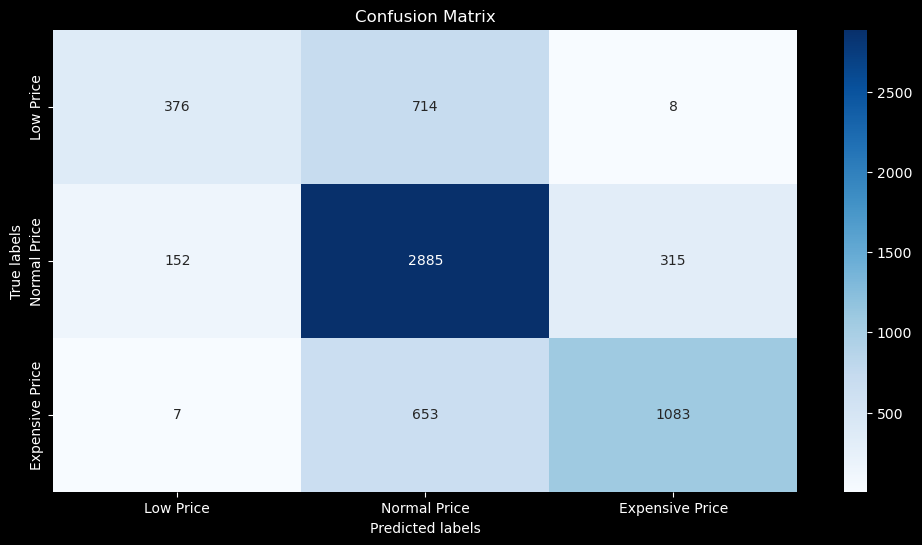

In [16]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision, Recall, F1-Score (for each class and average)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Create the matplotlib figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, ax=ax, cmap='Blues', fmt='g')

# Set labels for x and y axis, as well as title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Low Price', 'Normal Price', 'Expensive Price'])
ax.yaxis.set_ticklabels(['Low Price', 'Normal Price', 'Expensive Price'])

# Show the plot
plt.show()

Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class. The diagonal cells (from top left to bottom right) represent the number of correct predictions for each class. The off-diagonal cells show the misclassifications.​

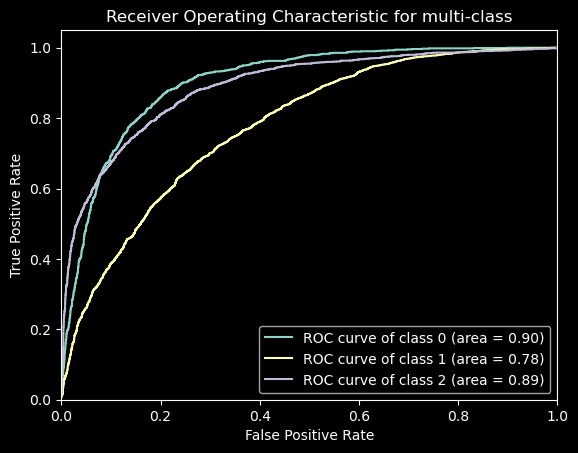

Macro-average AUC: 0.8557840177865724


In [17]:
# Binarize the output for ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = logistic_model_ovr.predict_proba(X_test)
n_classes = y_pred_proba.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

# A macro-average: average the AUC of each class
roc_auc["macro"] = np.mean(list(roc_auc.values()))
print("Macro-average AUC:", roc_auc["macro"])